**Glass classification**
this dataset contains 10 attributes.
they are id number, refractive index, sodium, magnesium, aluminium,silicon, pottasium, calcium, barium, iron and different types of glass

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv('/content/glass.csv')

In [3]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
print(dataset.dtypes)

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
dataset.isnull().value_counts()
# there is no null values

RI     Na     Mg     Al     Si     K      Ca     Ba     Fe     Type 
False  False  False  False  False  False  False  False  False  False    214
dtype: int64

In [8]:
df=dataset.drop_duplicates()

In [9]:
color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]


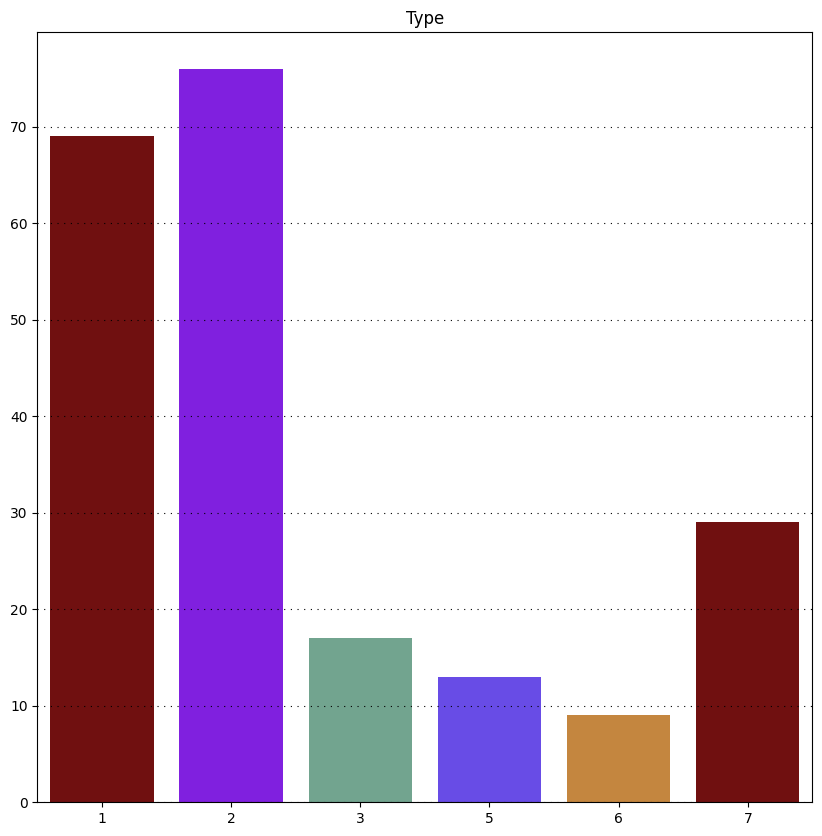

In [10]:
def plot_subplot(ax,x_label):
    ax.set_title(x_label)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.countplot(ax=ax,data=df,x=x_label,palette=color_palette)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig,axs = plt.subplots(1, 1,figsize=(10, 10), sharey=True)
plot_subplot(axs,'Type')



the dataset  is unbalanced , to make the dataset balanced we can add more samples to the minoer classes, smote stands for **synthetic minority oversampling technique**  
smote analysis:
first we take the random sample  of the data from the minority classes. then we find the nearest neighbours to the point by calculating the distance , then to increase the size of the dataset, we will randomly select one sample from the dataset and we generate the synthetic minority instance


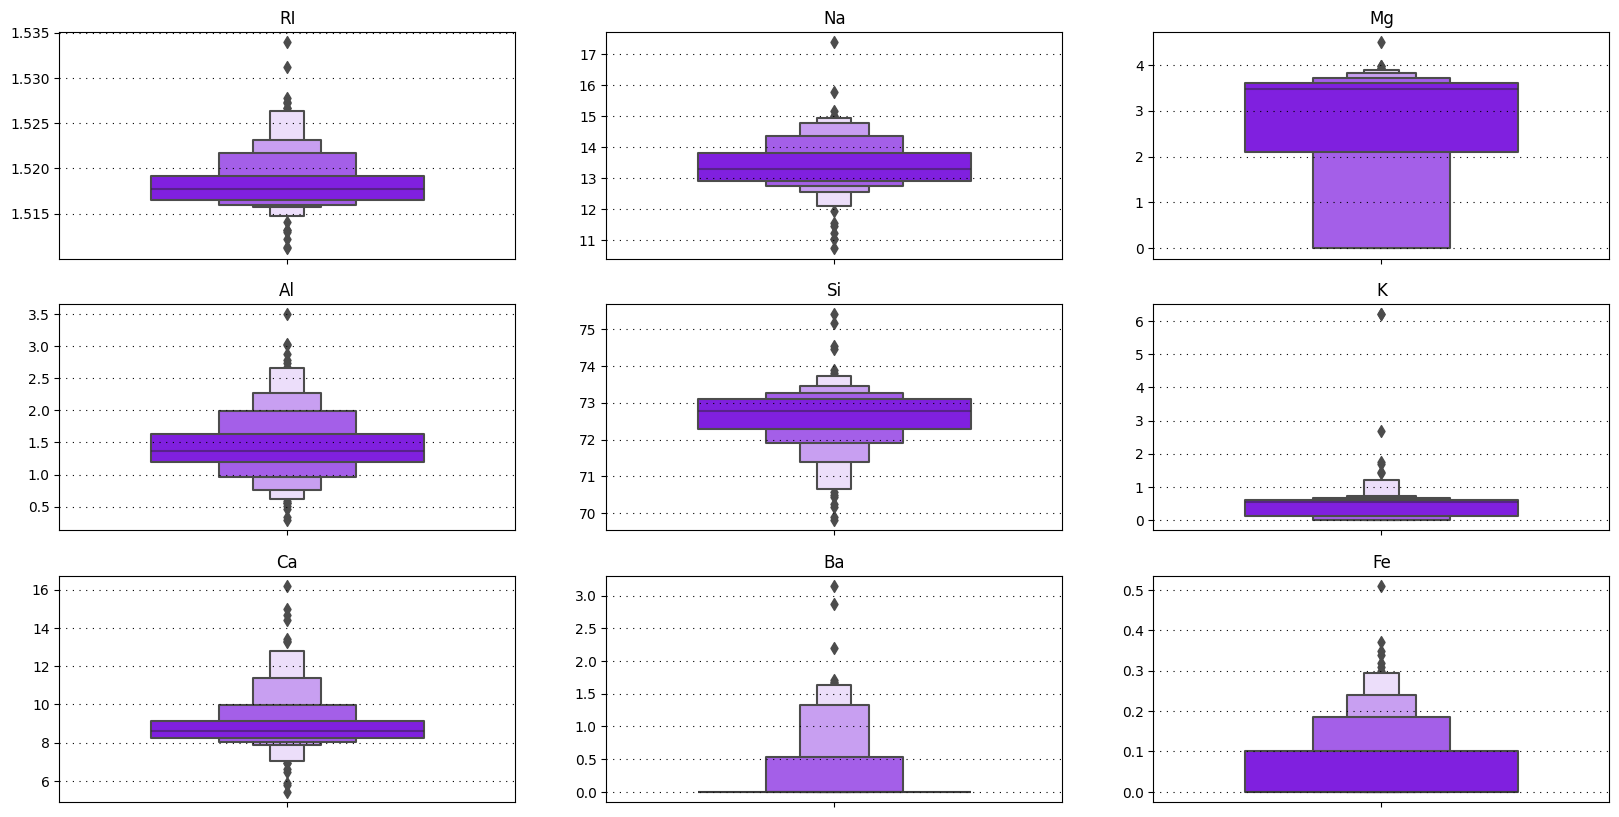

In [11]:
continuous_var=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']


color_palette = ["#800000","#8000ff","#6aac90","#5833ff","#da8829"]


def plot_subplot(ax,x_label):
    ax.set_title(x_label)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    sns.boxenplot(ax=ax,y=df[x_label],palette=["#8000ff"],width=0.6)
    ax.set_xlabel("")
    ax.set_ylabel("")

fig,axs = plt.subplots(3,3,figsize=(20, 10))
for ax, x_label in zip(axs.flatten(),continuous_var):
    plot_subplot(ax,x_label)


the outliers are present above or below the plot, this boxplot method is used for the outliers detection

Text(0.5, 0, 'Glass type number')

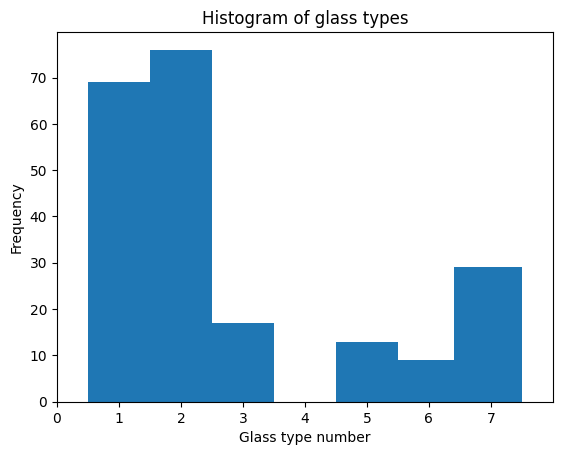

In [12]:
counts = np.bincount(df['Type'])
ax=df['Type'].plot(kind='hist')
ax.bar(range(0,8), counts, width=1, align='center')
ax.set(xticks=range(0,8), xlim=(0,8))
ax.set_title('Histogram of glass types')
ax.set_ylabel('Frequency')
ax.set_xlabel('Glass type number')


In [15]:
bins=np.linspace(min(df['Type']), max(df['Type']),8)
group_names=['type1','type2','type3','type4','type5','type6','type7']
df['Type_binned']=pd.cut(df['Type'], bins, labels=group_names, include_lowest=True)
df['Type_binned'].value_counts()


<ipython-input-15-a8e4b7571747>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type_binned']=pd.cut(df['Type'], bins, labels=group_names, include_lowest=True)


type2    76
type1    69
type7    29
type3    17
type5    13
type6     9
type4     0
Name: Type_binned, dtype: int64

In [16]:
df.drop(['Type_binned'], axis=1).corr()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


*it is found that the glass components that are most correlated with the type are , sodium, magnesium, aluminum and barium,*

the elements that are most correlated with the refractive index are aluminium, silicon, pottasium, calcium

**classification algorithms**

In [17]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold

*perform scaling*

In [18]:
X=df.drop(['Type', 'Type_binned'], axis=1)


In [19]:
Y=df['Type']


In [20]:
x_train,x_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, shuffle=True, stratify=Y, random_state=42)


In [21]:
scaler=preprocessing.StandardScaler().fit(x_train)


In [22]:
x_train=scaler.transform(x_train.astype(float))
x_test=scaler.transform(x_test.astype(float))


In [23]:
print("type counts in train set: \n", y_train.value_counts())
print("type counts in test set: \n", y_test.value_counts())


type counts in train set: 
 2    61
1    55
7    23
3    14
5    10
6     7
Name: Type, dtype: int64
type counts in test set: 
 2    15
1    14
7     6
5     3
3     3
6     2
Name: Type, dtype: int64


In [24]:
def plot_cmatrix(y_test, y_hat):
    fig, ax = plt.subplots(figsize=(8, 5))
    labels=["Type 1","Type 2","Type 3","Type 5", "Type 6", "Type 7"]
    cmp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat),display_labels=labels,)
    cmp.plot(ax=ax)
    return plt.show();


KNN algorithm

In [25]:
knn=KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
knn
y_hat=knn.predict(x_test)

print("KNN Train set accuracy: ", metrics.accuracy_score(y_train,knn.predict(x_train)))
print("KNN Test set accuracy: ", metrics.accuracy_score(y_test,y_hat))

KNN Train set accuracy:  0.8352941176470589
KNN Test set accuracy:  0.7674418604651163


In [26]:
Ks=10
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
for n in range(1, Ks):
    knn=KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    y_hat=knn.predict(x_test)
    mean_acc[n-1]=metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1]=np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
print(mean_acc)

print("The best accuracy ", mean_acc.max(), " with k = ", mean_acc.argmax()+1)

[0.72093023 0.79069767 0.76744186 0.72093023 0.72093023 0.72093023
 0.72093023 0.72093023 0.69767442]
The best accuracy  0.7906976744186046  with k =  2


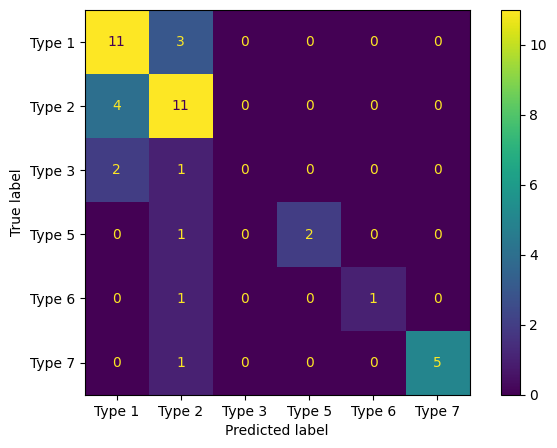

In [27]:
plot_cmatrix(y_test, y_hat)


In [28]:
print("For KNN with k=", mean_acc.argmax()+1, ":")
print(classification_report(y_test, y_hat, zero_division=0))
knn_score=knn.score(x_test, y_test)
print("accuracy :",knn_score)


For KNN with k= 2 :
              precision    recall  f1-score   support

           1       0.65      0.79      0.71        14
           2       0.61      0.73      0.67        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.70        43
   macro avg       0.71      0.59      0.63        43
weighted avg       0.68      0.70      0.68        43

accuracy : 0.6976744186046512


**svm algorithm**

For SVM :
SVC(C=31.622776601683793, decision_function_shape='ovo')
              precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.75      0.80      0.77        15
           3       0.67      0.67      0.67         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.77        43
   macro avg       0.75      0.77      0.76        43
weighted avg       0.76      0.77      0.76        43



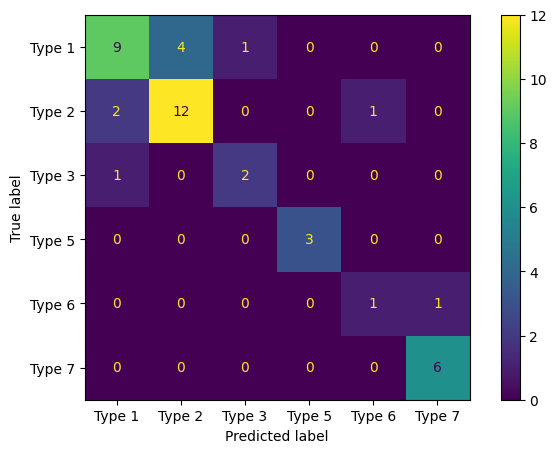

accuracy : 0.7674418604651163


In [29]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':['scale', 'auto'],
             'class_weight':['balanced', None],
             'decision_function_shape':['ovo', 'ovr']}
svm = SVC()

cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=1)
svm_cv=GridSearchCV(svm, parameters, cv=cv).fit(x_train, y_train)

y_hat=svm_cv.predict(x_test)
print("For SVM :")
print(svm_cv.best_estimator_)
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
svm_cv_score=svm_cv.score(x_test, y_test)
print("accuracy :",svm_cv_score)


**logistic regression**

Logistic Regression (multi_class='ovr'):
              precision    recall  f1-score   support

           1       0.69      0.64      0.67        14
           2       0.61      0.73      0.67        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.33      0.50      0.40         2
           7       1.00      1.00      1.00         6

    accuracy                           0.67        43
   macro avg       0.61      0.59      0.59        43
weighted avg       0.66      0.67      0.66        43



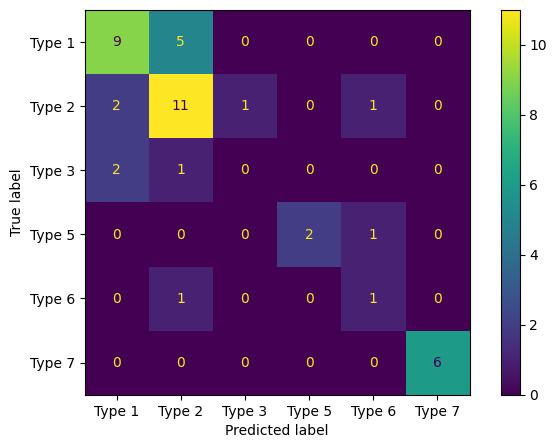

accuracy : 0.6744186046511628


In [30]:
model = LogisticRegression(multi_class='ovr')
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print("Logistic Regression (multi_class='ovr'):")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
logreg_score=model.score(x_test, y_test)
print("accuracy :",logreg_score)

**decision tree classifier**

DecisionTreeClassifier:
              precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.67      0.53      0.59        15
           3       0.40      0.67      0.50         3
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         2
           7       0.75      1.00      0.86         6

    accuracy                           0.67        43
   macro avg       0.68      0.75      0.68        43
weighted avg       0.70      0.67      0.67        43



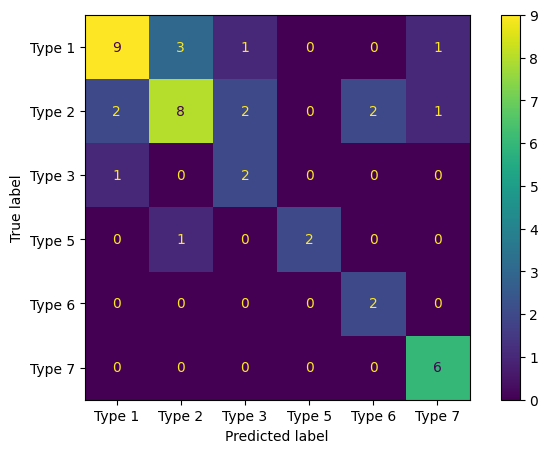

accuracy : 0.6744186046511628


In [31]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print("DecisionTreeClassifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
tree_score=model.score(x_test, y_test)
print("accuracy :",tree_score)


**random forest**

Random Forest Classifier:
              precision    recall  f1-score   support

           1       0.87      0.93      0.90        14
           2       0.86      0.80      0.83        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.84      0.84      0.83        43
weighted avg       0.87      0.86      0.86        43



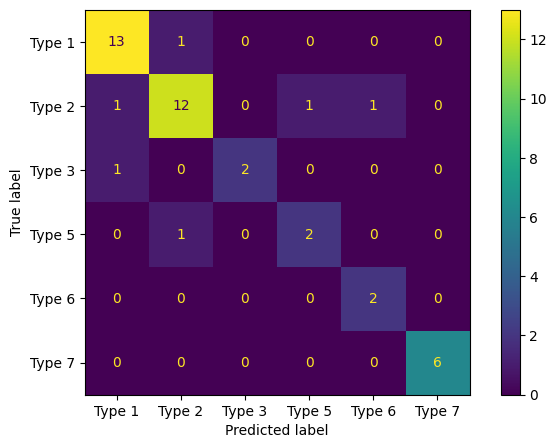

accuracy : 0.8604651162790697


In [32]:

RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train, y_train)
y_hat = RFC.predict(x_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_hat, zero_division=0))
plot_cmatrix(y_test, y_hat)
RFC_score=RFC.score(x_test, y_test)
print("accuracy :",RFC_score)


In [35]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv("/content/glass.csv")  # Replace with your dataset file



X = data.drop("Type", axis=1)  # Feature
y = data["Type"]  # Target variable

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X, y)

new_instance = pd.DataFrame({
    "RI": [1.51630],
    "Na": [13.24],
    "Mg": [3.64],
    "Al": [1.49],
    "Si": [72.3],
    "K": [0.63],
    "Ca": [8.05],
    "Ba": [0],
    "Fe": [0.12]
})


predicted_class = model.predict(new_instance)

print(f"Predicted Glass Type: {predicted_class[0]}")


Predicted Glass Type: 2


In [36]:
new_instance = pd.DataFrame({
    "RI": [1.51707],
    "Na": [14.71],
    "Mg": [3.54],
    "Al": [1.59],
    "Si": [72.11],
    "K": [0.55],
    "Ca": [8.53],
    "Ba": [0],
    "Fe": [0.00]
})

predicted_class = model.predict(new_instance)

print(f"Predicted Glass Type: {predicted_class[0]}")


Predicted Glass Type: 3
